# DATA WRANGLING

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('max_columns', 100)

In [3]:
df_raw = pd.read_csv('data/2019-candidate-campaigns.csv', index_col=0)
df_raw.fillna(0, inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 61
Data columns (total 41 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Candidate                                            62 non-null     object 
 1   Coalition                                            62 non-null     object 
 2   Party                                                62 non-null     object 
 3   Twitter - Number of Mentions                         62 non-null     float64
 4   Twitter - Number of Users                            62 non-null     float64
 5   Twitter- Total Favorites                             62 non-null     float64
 6   Twitter - Total Retweets                             62 non-null     float64
 7   Twitter - Total Replies                              62 non-null     float64
 8   Twitter - Percent News                               62 non-null     flo

In [4]:
candidates = df_raw.iloc[:, 0:3]
contrib = df_raw.loc[:, 'Win': 'Total Contributions Received'].fillna(0)
df = pd.concat([candidates,contrib], axis =1)

In [5]:
candidates = df_raw.iloc[:, 0:3]
contrib = df_raw.loc[:, 'Win': 'Total Contributions Received'].fillna(0)
df = pd.concat([candidates,contrib], axis =1)
df['Total Cash Contributions'] = df['Cash Contributions Received from Other Sources'] + df['Cash Contributions Received from Political Party']
df['Total In-Kind Contributions'] = df['In-Kind Contributions Received from Other Sources'] + df['In-Kind Contributions Received from Political Party']
df

,Candidate,Coalition,Party,Win,Cash Contributions Received from Other Sources,In-Kind Contributions Received from Other Sources,Cash Contributions Received from Political Party,In-Kind Contributions Received from Political Party,Total Contributions Received,Total Cash Contributions,Total In-Kind Contributions
Candidate Number,,,,,,,,,,,
1,Abner Afuang,WPP,WPP,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Agnes Escudero,KKK,Independent,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Allan Montaño,Labor Win,Independent,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,Balde Baldevarona,0,Independent,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,Bam Aquino,Otso Diretso,Liberal,0.0000,"126,350,000.0000","300,000.0000",0.0000,0.0000,"126,650,000.0000","126,350,000.0000","300,000.0000"
...,...,...,...,...,...,...,...,...,...,...,...
57,Shariff Albani,WPP,WPP,0.0000,"400,000.0000","104,978.0000",0.0000,0.0000,"504,978.0000","400,000.0000","104,978.0000"
58,Sonny Angara,HNP,LDP,1.0000,0.0000,0.0000,0.0000,"153,341,072.4100","153,341,072.4100",0.0000,"153,341,072.4100"
59,Sonny Matula,"Labor Win, WPP",WPP,0.0000,"102,000.0000","218,441.9100",0.0000,0.0000,"320,441.9100","102,000.0000","218,441.9100"


# [NOT INCLUDED] Bar Chart - Contrib vs Expenditure

In [44]:
df_raw = pd.read_csv('data/2019-candidate-campaigns.csv', index_col=0)
df_win = df_raw[df_raw["Win"]==1]
cands = df_raw.iloc[:, :1]
win = df_raw.loc[:, "Win"]
contrib = df_raw.loc[:, "Total Contributions Received"]
exp = df_raw.loc[:, "Total Expenditures Incurred"]

df_draft = pd.concat([cands, win, contrib, exp], axis=1)
df_win = df_draft[df_draft["Win"]==1]
df_lose = df_draft[df_draft["Win"]==0]

In [29]:
df_win = df_win.sort_values("Total Expenditures Incurred", ascending = False)
df_lose = df_lose.sort_values("Total Expenditures Incurred", ascending = False)

df_win1 = df_win.drop("Win", axis=1)
df_lose1 = df_lose.drop("Win", axis=1)

win = pd.melt(df_win1, id_vars="Candidate")
lose = pd.melt(df_lose1, id_vars="Candidate")

#### [NOT INCLUDED] Winning Candidates plot

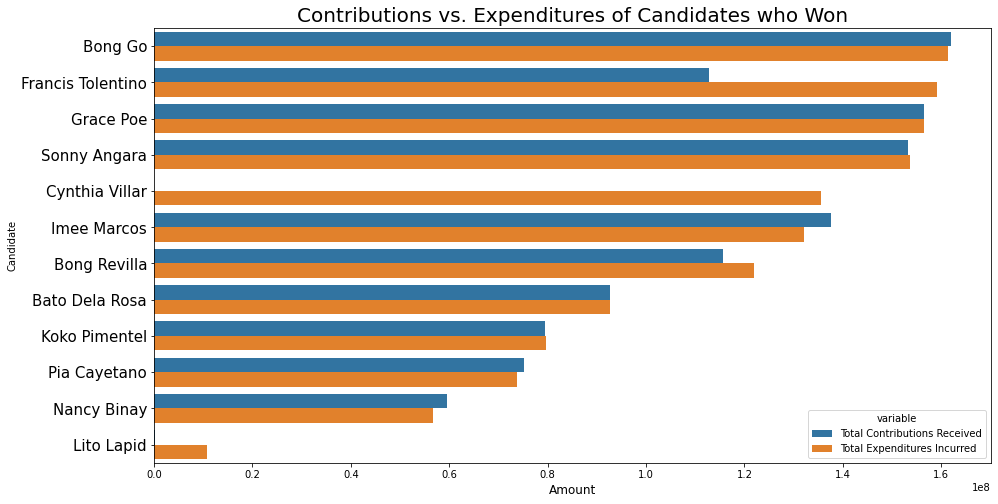

In [31]:
plt.figure(figsize=(15, 8))
sns.barplot(x="value", y="Candidate", hue="variable", data=win)

plt.title('Contributions vs. Expenditures of Candidates who Won', fontsize = 20)
plt.xlabel('Amount', fontsize=12)
plt.yticks(fontsize=15)

plt.show()

#### [NOT INCLUDED] Losing Candidates Plot

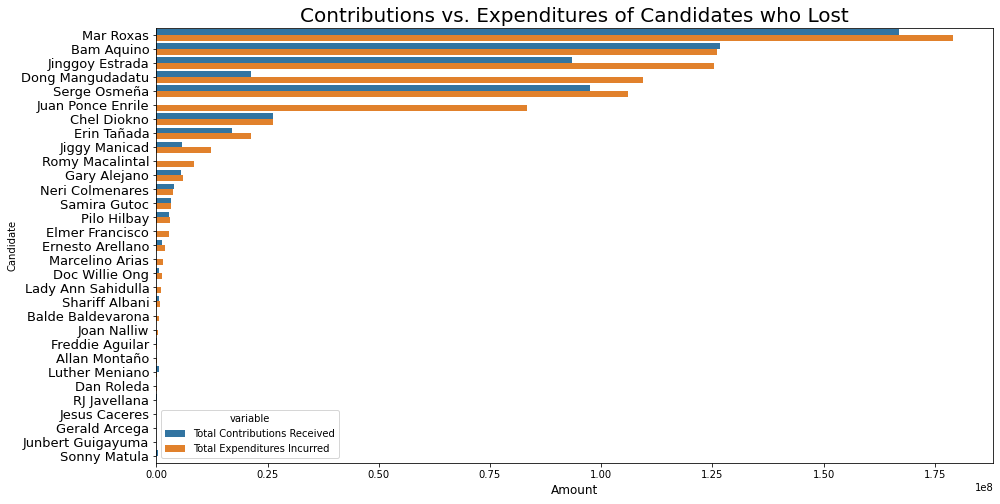

In [32]:
plt.figure(figsize=(15, 8))
sns.barplot(x="value", y="Candidate", hue="variable", data=lose)


plt.title('Contributions vs. Expenditures of Candidates who Lost', fontsize = 20)
plt.xlabel('Amount', fontsize=12)
plt.yticks(fontsize=13)

plt.show()

# BOX PLOT - Contributions Analysis

In [11]:
win = df.iloc[:, :4]
total_contrib = df.iloc[:, 8:]
df1 = pd.concat([win, total_contrib], axis=1)

melted_df1=pd.melt(df1.iloc[:, 3:], id_vars="Win")
melted_df1

,Win,variable,value
0,0.0000,Total Contributions Received,0.0000
1,0.0000,Total Contributions Received,0.0000
2,0.0000,Total Contributions Received,0.0000
3,0.0000,Total Contributions Received,0.0000
4,0.0000,Total Contributions Received,"126,650,000.0000"
...,...,...,...
181,0.0000,Total In-Kind Contributions,"104,978.0000"
182,1.0000,Total In-Kind Contributions,"153,341,072.4100"
183,0.0000,Total In-Kind Contributions,"218,441.9100"
184,0.0000,Total In-Kind Contributions,0.0000


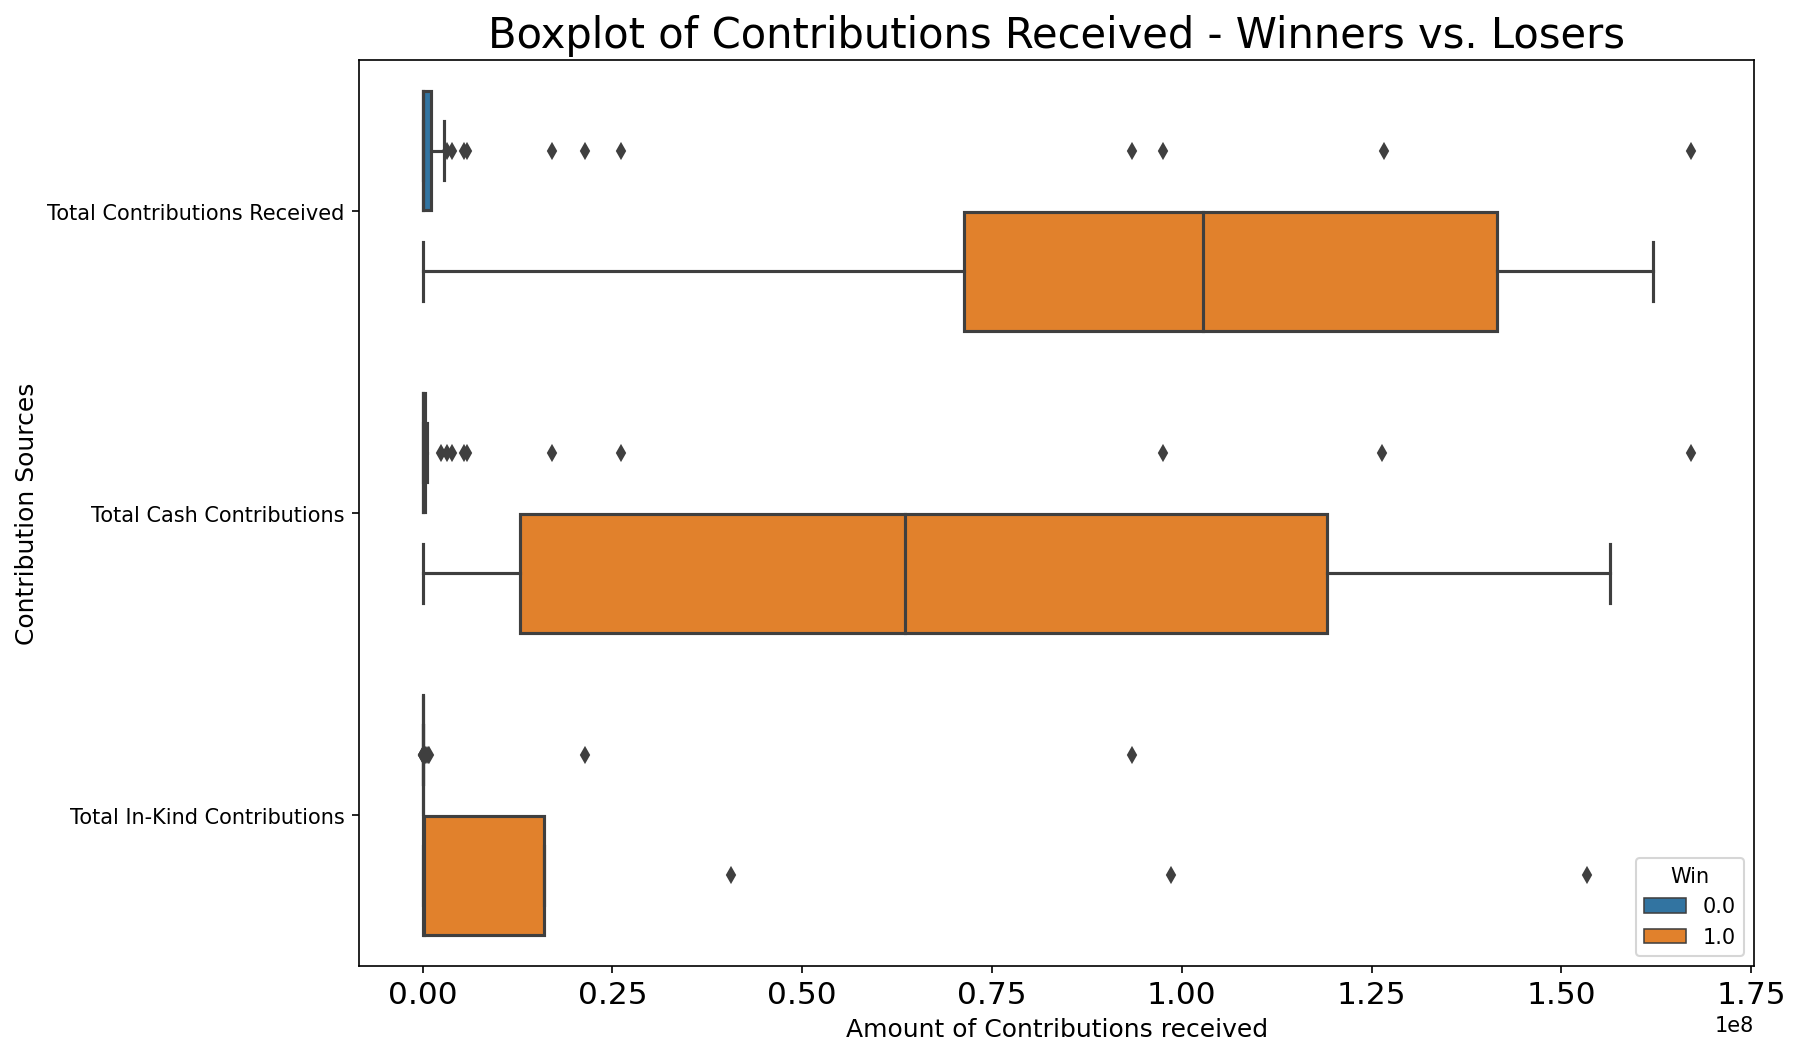

In [13]:
plt.figure(figsize=(12,8), dpi = 150)

sns.boxplot(y = melted_df1['variable'],
            x = melted_df1['value'],
            hue = melted_df1['Win'])

plt.title('Boxplot of Contributions Received - Winners vs. Losers', fontsize = 20)
plt.ylabel('Contribution Sources', fontsize=12)
plt.xlabel('Amount of Contributions received', fontsize=12)
plt.xticks(fontsize=15)

plt.show()